## <span style="color: red;">CatchPhish</span> - An ML Approach to URL Phishing Detection
<br>

### Advanced Modeling - Building The Advanced Baselines

<br>

#### Author: Omar Kreidie


## <a id ='0'></a>
## Table of Contents: 

1. [Business Context + Goals](#1)
2. [Data Information + Data Dictionary](#2)
3. [Libraries](#3)
4. [Data Dictionary + Info](#5)
5. [The Flow Of the Report](#4)
    - [EDA](#6)
    - [Preprocessing](#7)
    
    - [Modeling](#8)
6. [Feature Selection](#9)
    - [Variance Thresholding](#9)
    - [Correlation Analysis W/Target Variable](#11)
7. [Logistic Regression Model 1 W/Variance Thresholding](#13)
8. [Logistic Regression Model 2 W/ALL Features](#14)
9. [Logistic Regression Model 3 W/Correlation Analysis + Variance Thresholding](#15)
10. [Intercorrelation Analysis Between Features](#16)
    - [Final Heatmap After Removing All Features W/High Collinearity](#17)
11. [Final Baseline Model](#18)
12. [Final Logistic Regression Model Analysis](#19)
13. [Final Logistic Regression Model Feature Importance Analysis](#20)
14. [Summary + Next Steps](#21)

## Business Context + Goals
<a id="1"></a>

Cybercrime and fraud in on the rise and with Generative AI models getting better at coding and replicating, the barrier to entry to fraud is lower than ever. 

<br> With CatchPhish, we're focused on protecting consumers from fraud and phishing URL's. More specifically, we're focusing on protecting Small To Medium Businesses because 43% of all cyberattacks are on SMB's and as stated by the World Economic Forum, 95% of all cyber breaches are attributed to human error. 

<br>The technical goal of this project is to build a classification model that can decipher phishing from Legitimate URL's. With that goal in mind, it is important to have an overall highly accurate model (high F1 score). In addition to an accurate model, the model will be optimized for percision. High percision is crucial for this model because classifying a phishing URL as legitimate is far more costly and dangerous that a false positive. 

# Data Information + Data Dictionary <a id="5"></a>
### Brief overview:
The data was retrieved from [PHIUSIIL Phishing URL Dataset](https://archive.ics.uci.edu/dataset/967/phiusiil+phishing+url+dataset). The dataset has 235,795 Rows and 56 Features. The target feature is the 'label' common which is binary. 0 = Phishing and 1 = Legitimate. The data is fairly evenly split, which avoids class imbalance, helping us build a stronger predictive model. there are 134850 Legitimate and 100945 Phishing URL's. 

<br> The data dictionary contains a basic descritpion. In the sections below where I analyse the features, I provide definitions where needed. 


### Data Dictionary

| Column Name                  | Data Type  | Description |
|------------------------------|-----------|-------------|
| **FILENAME**                 | object    | Name of the file containing the URL. |
| **URL**                      | object    | The full URL being analyzed. |
| **URLLength**                | int64     | Length of the URL in characters. |
| **Domain**                   | object    | The domain name extracted from the URL. |
| **DomainLength**             | int64     | Length of the domain name. |
| **IsDomainIP**               | int64     | Indicator if the domain is an IP address (1 = Yes, 0 = No). |
| **TLD**                      | object    | The top-level domain (e.g., .com, .org). |
| **URLSimilarityIndex**       | float64   | Similarity score of the URL compared to known legitimate domains. |
| **CharContinuationRate**     | float64   | Measure of continuous character sequences in the URL. |
| **TLDLegitimateProb**        | float64   | Probability that the TLD belongs to a legitimate site. |
| **URLCharProb**              | float64   | Probability of character distribution in the URL being legitimate. |
| **TLDLength**                | int64     | Length of the top-level domain. |
| **NoOfSubDomain**            | int64     | Number of subdomains in the URL. |
| **HasObfuscation**           | int64     | Indicates if the URL contains obfuscation techniques (1 = Yes, 0 = No). |
| **NoOfObfuscatedChar**       | int64     | Number of obfuscated characters in the URL. |
| **ObfuscationRatio**         | float64   | Ratio of obfuscated characters in the URL. |
| **NoOfLettersInURL**         | int64     | Number of letters in the URL. |
| **LetterRatioInURL**         | float64   | Ratio of letters in the URL. |
| **NoOfDigitsInURL**          | int64     | Number of digits in the URL. |
| **DigitRatioInURL**          | float64   | Ratio of digits in the URL. |
| **NoOfEqualsInURL**          | int64     | Number of equal signs (=) in the URL. |
| **NoOfQMarkInURL**           | int64     | Number of question marks (?) in the URL. |
| **NoOfAmpersandInURL**       | int64     | Number of ampersands (&) in the URL. |
| **NoOfOtherSpecialCharsInURL** | int64   | Number of special characters in the URL. |
| **SpecialCharRatioInURL**    | float64   | Ratio of special characters in the URL. |
| **ISHTTPS**                  | int64     | Indicates if the URL uses HTTPS (1 = Yes, 0 = No). |
| **LineOfCode**               | int64     | Number of lines of code in the webpage source. |
| **LargestLineLength**        | int64     | Length of the longest line of code in the webpage source. |
| **HasTitle**                 | int64     | Indicates if the webpage has a title tag (1 = Yes, 0 = No). |
| **Title**                    | object    | The title of the webpage. |
| **DomainTitleMatchScore**    | float64   | Similarity score between the domain and webpage title. |
| **URLTitleMatchScore**       | float64   | Similarity score between the URL and webpage title. |
| **HasFavicon**               | int64     | Indicates if the webpage has a favicon (1 = Yes, 0 = No). |
| **Robots**                   | int64     | Indicates if the webpage has a robots.txt file (1 = Yes, 0 = No). |
| **IsResponsive**             | int64     | Indicates if the webpage is mobile-responsive (1 = Yes, 0 = No). |
| **NoOfURLRedirect**          | int64     | Indicates if URL redirects to another page. (1 = Yes, 0 = No) |
| **NoOfSelfRedirect**         | int64     | Indicates if URL redirects manually. (1 = Yes, 0 = No)|
| **HasDescription**           | int64     | Indicates if the webpage has a meta description (1 = Yes, 0 = No). |
| **NoOfPopup**                | int64     | Number of popups found on the webpage. |
| **NoOfiFrame**               | int64     | Number of iframe elements in the webpage. |
| **HasExternalFormSubmit**    | int64     | Indicates if the page submits forms to an external site (1 = Yes, 0 = No). |
| **HasSocialNet**             | int64     | Indicates if the webpage contains social media links (1 = Yes, 0 = No). |
| **HasSubmitButton**          | int64     | Indicates if the webpage has a submit button (1 = Yes, 0 = No). |
| **HasHiddenFields**          | int64     | Indicates if the webpage contains hidden input fields (1 = Yes, 0 = No). |
| **HasPasswordField**         | int64     | Indicates if the webpage has a password input field (1 = Yes, 0 = No). |
| **Bank**                     | int64     | Indicates if the webpage contains banking-related terms (1 = Yes, 0 = No). |
| **Pay**                      | int64     | Indicates if the webpage contains payment-related terms (1 = Yes, 0 = No). |
| **Crypto**                   | int64     | Indicates if the webpage contains cryptocurrency-related terms (1 = Yes, 0 = No). |
| **HasCopyrightInfo**         | int64     | Indicates if the webpage includes copyright information (1 = Yes, 0 = No). |
| **NoOfImage**                | int64     | Number of images on the webpage. |
| **NoOfCSS**                  | int64     | Number of CSS files linked in the webpage. |
| **NoOfJS**                   | int64     | Number of JavaScript files linked in the webpage. |
| **NoOfSelfRef**              | int64     | Number of self-references in the webpage. |
| **NoOfEmptyRef**             | int64     | Number of empty references in the webpage. |
| **NoOfExternalRef**          | int64     | Number of external references in the webpage. |
| **label**                    | int64     | The classification label (e.g., 0 for Phising, 1 for Legitimate). |


### Libraries <a id="3"></a>

In [51]:
#Data frames + Array libraries
import pandas as pd
import numpy as np 

#Plotting Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

#Statistics libraries
from scipy import stats
from scipy.stats import norm 


#Sklearn model library for logistic regression + preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.inspection import permutation_importance


#Modelling libraries for the DecisionTree + PCA Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

#Random Forest from sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier

#importing xgboost
import xgboost as xgb

from warnings import filterwarnings
filterwarnings(action='ignore')

[nltk_data] Downloading package punkt to /Users/kreidie/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Advanced Baseline Models  <a id="8"></a>

This notebook will focus on building baseline models for the following algorithims: 

<br> 1. Decision Trees

<br> 2. Random Forest

<br> 3. XGBoost 

<br> The goal is to determine the top 2 models and optimize them in the next notebook. I will go into detail for optimization in the next notebook. For now, a couple sanity checks will be completed to ensure we are working with our cleaned data. 

In [12]:
old_phish = pd.read_csv('../dataset/PhiUSIIL_Phishing_URL_Dataset.csv')

In [13]:
#Sanity check
old_phish.head()


FILENAME                                 URL  URLLength  \
0  521848.txt    https://www.southbankmosaics.com         31   
1   31372.txt            https://www.uni-mainz.de         23   
2  597387.txt      https://www.voicefmradio.co.uk         29   
3  554095.txt         https://www.sfnmjournal.com         26   
4  151578.txt  https://www.rewildingargentina.org         33   

                       Domain  DomainLength  IsDomainIP  TLD  \
0    www.southbankmosaics.com            24           0  com   
1            www.uni-mainz.de            16           0   de   
2      www.voicefmradio.co.uk            22           0   uk   
3         www.sfnmjournal.com            19           0  com   
4  www.rewildingargentina.org            26           0  org   

   URLSimilarityIndex  CharContinuationRate  TLDLegitimateProb  ...  Pay  \
0               100.0              1.000000           0.522907  ...    0   
1               100.0              0.666667           0.032650  ...    0   
2               100.0              0.866667           0.028555  ...    0   
3               100.0              1.000000           0.522907  ...    1   
4               100.0              1.000000           0.079963  ...    1   

   Crypto  HasCopyrightInfo  NoOfImage  NoOfCSS  NoOfJS  NoOfSelfRef  \
0       0                 1         34       20      28          119   
1       0                 1         50        9       8           39   
2       0                 1         10        2       7           42   
3       1                 1          3       27      15           22   
4       0                 1        244       15      34           72   

   NoOfEmptyRef  NoOfExternalRef  label  
0             0              124      1  
1             0              217      1  
2             2                5      1  
3             1               31      1  
4             1               85      1  

[5 rows x 56 columns]

In [14]:
#Checking if the class balance is consistent
old_phish['label'].value_counts()

label
1    134850
0    100945
Name: count, dtype: int64

In [7]:
#loading the reduced dataset from the reduction notebook. 
phish = pd.read_csv('../dataset/reduced_phish4.csv')

In [8]:
phish.head()

DomainLength  TLDLegitimateProb  TLDLength  NoOfSubDomain  \
0            24           0.522907          3              1   
1            16           0.032650          2              1   
2            22           0.028555          2              2   
3            19           0.522907          3              1   
4            26           0.079963          3              1   

   NoOfLettersInURL  LetterRatioInURL  NoOfEqualsInURL  NoOfQMarkInURL  \
0                18             0.581                0               0   
1                 9             0.391                0               0   
2                15             0.517                0               0   
3                13             0.500                0               0   
4                20             0.606                0               0   

   LineOfCode  LargestLineLength  ...  HasHiddenFields  HasPasswordField  \
0         558               9381  ...                1                 0   
1         618               9381  ...                0                 0   
2         467                682  ...                1                 0   
3        6356              26824  ...                1                 0   
4        6089              28404  ...                1                 0   

   Bank  Pay  Crypto  NoOfImage  NoOfCSS  NoOfJS  NoOfEmptyRef  \
0     1    0       0         34       20      28             0   
1     0    0       0         50        9       8             0   
2     0    0       0         10        2       7             2   
3     0    1       1          3       27      15             1   
4     1    1       0        244       15      34             1   

   NoOfExternalRef  
0              124  
1              217  
2                5  
3               31  
4               85  

[5 rows x 31 columns]

In [10]:
#sanity check, looking at number of columns and rows in reduced data frame. 
phish_shape = phish.shape

print(f'The dataframe has {phish_shape[0]} rows and {phish_shape[1]} columns')

The dataframe has 235795 rows and 31 columns


## The Benchmark - Logistic Regression Model

### Logistic Regression Classifier Performance

**Metrics:**
- **Accuracy:** 0.9963  
- **Precision:** 0.9970  
- **Recall:** 0.9965  
- **F1 Score:** 0.9967  

---

**Confusion Matrix:**

[20108 81]<br>
[95 26875]

---
**Classification Report**  

          precision    recall  f1-score   support

       0       1.00      1.00      1.00     20189
       1       1.00      1.00      1.00     26970

## Model 1 - Decision Tree

In [24]:
# classifying dependent and independent variable
X = phish
y = old_phish['label']

# splitting train and test datasets 
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)
# pipeline
pipeline = Pipeline([
    ('clf', DecisionTreeClassifier(random_state=42)) 
])

# setting the baseline hyperparameter grid 
param_grid = {
    'clf__max_depth': [5, 10, 15, None], # How deep the decision tree goes 
    'clf__min_samples_split': [2, 5, 10], # minimum # of samples to split a node
    'clf__min_samples_leaf': [1, 2, 4], # mini number of samples required to split node
    'clf__criterion': ['gini', 'entropy'] # the criteria used to measure the quality of each split
}

# Grid search
grid_search = GridSearchCV(
    pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1
)
grid_search.fit(X_train, y_train)

# Evaluation
y_pred = grid_search.predict(X_test)
y_proba = grid_search.predict_proba(X_test)[:, 1]

Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [76]:
print("Best Parameters:\n", grid_search.best_params_)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

Best Parameters:
 {'clf__criterion': 'entropy', 'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2}
Confusion Matrix:
 [[19976   213]
 [  161 26809]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     20189
           1       0.99      0.99      0.99     26970

    accuracy                           0.99     47159
   macro avg       0.99      0.99      0.99     47159
weighted avg       0.99      0.99      0.99     47159

ROC AUC Score: 0.9991097219889029


## ROC Curve + AUC

The receiver operating characteristic (ROC) plots the false positive rate and the true positive rate (recall). It's useful because it helps evaluate how well the model separates the classes. 

AUC, is the area under the curve which summarized the ROC curve into a single number. With an AUC of 0.5, you're looking at a model that is randomly guessing. While ewith an AUC of 1.0, now you're looking at perfect classification. 

In [80]:
# find the predicted probabilities
y_proba = grid_search.predict_proba(X_test)[:, 1]

# computing the ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# initiallizing the figure
fig = go.Figure()

# adding the ROC curve
fig.add_trace(go.Scatter(
    x=fpr, y=tpr,
    mode='lines',
    name=f'ROC curve (AUC = {roc_auc:.4f})', # adding 4 significant figures for clarity
    line=dict(color='orange', width=2)
))

# beautifying the graph
fig.update_layout(
    title='ROC Curve - Decision Tree',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    legend=dict(x=0.65, y=0.05),
    width=700,
    height=500
)
fig.show()

### ROC Curve Analysis

The ROC curve is super tight on the top left corner, which indicated that the model has an excellent near perfect performance. This means that the True positive rate is close to 100% and the false positive rate is close to 0. 

---- 

The AUC = 0.9991, which is nearly perfect, meaning the model is almost always able to distinguishe phishing form legitimate. 

<br> Although this may seem concerning, it's a patter that was noticed earlier in the project and is happening because the features in the dataset are highly predictive of the target variable. 

### Decision Tree Best Parameters

In [28]:
grid_search.best_params_

{'clf__criterion': 'entropy',
 'clf__max_depth': 5,
 'clf__min_samples_leaf': 1,
 'clf__min_samples_split': 2}

## Decision Tree Parameter Analysis

Interestingly, the best-performing Decision Tree model uses less complex parameters. This suggests that the features in the dataset carry high predictive power. As a result, the model can make confident splits early on, reducing the need for deeper tree structures. The preference for entropy over gini may indicate that maximizing information gain better captures class separation in this dataset.

<br> In short, the best parameters for the Decision Tree model are on the less complex end. This is likely because the features present have high predicting power, therefore, the model doesn’t need to go too deep into the decision trees to get a higher score.

### Decision Tree Model Analysis 

## Model 2 - Random Forest + Decision Tree

What is Random Forest:

<br> What the goal of the hyperparameters are:

<br> Given that our features have extremely strong predicting power, the parameters we use are to eliminate overfitting to prove, that it does not exist within our model. 

----
<br> The Parameters we will control and what they mean: 

- clf__max_depth: 
    - Limits how deep each individual decision tree can grow.
    - The importance of limiting the depth of each tree stems from eliminating overfitting. 
    - starting with an average max depth of 20, allows deep trees, that captue the structure without going in too deep, leading to over fitting. 
    
----

- clf__min_samples_leaf:
    - Provides the minimum number of samples required to be at a leaf node.
    - The importance of parameter is that the higher values smooth the model, reducing overfitting.
    - Having average min samples of 2, helps prevent splits that are too specific. 

----

- clf__min_samples_split:
    - Limits the number samples required to split an internal node. 
    - This is important because it controls when a node is allowed to split. We want to reduce restriction on this parameter because we want our model to be more complex
    - with an average split of 6 there is some good diversity for a more restrictive split at 10 and a more permissive split at 2. 
    
----

- clf__n_estimators: 
    - This determines the number of deicion teres in the forest. 
    - This is important because controlling the number of trees controls the performance. More trees often means better performance (can stagnate) but increases computation time. 
    - the average sized forest is 200 tree, allowing our model to try a diverse array of trees. 

In [36]:
# splitting independent & dependent variables
X = phish
y = old_phish['label']

# splitting train & test sets 
X_train, X_test, y_train, y_test = train_test_split( 
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42)

# building a pipeline with random forest
rf_pipeline = Pipeline([
    ('clf', RandomForestClassifier(random_state=42))
])

# setting a wide array of parameters for baseline 
rf_param_grid = {
    'clf__n_estimators': [100, 200, 300],
    'clf__max_depth': [10, 20, 30],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4],
}

# running a grid search
rf_grid = GridSearchCV(
    rf_pipeline,
    rf_param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

# fitting the model
rf_grid.fit(X_train, y_train)

# evaluating the model
y_pred_rf = rf_grid.predict(X_test)
y_proba_rf = rf_grid.predict_proba(X_test)[:, 1]

Fitting 5 folds for each of 81 candidates, totalling 405 fits


### Random Forest Model Result

In [77]:
print("Best Parameters (baseline):\n", rf_grid.best_params_)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_rf))

Best Parameters (baseline):
 {'clf__max_depth': 20, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 300}
Confusion Matrix:
 [[20140    49]
 [   23 26947]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     20189
           1       1.00      1.00      1.00     26970

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159

ROC AUC Score: 0.9999762514905264


Best Parameters (baseline): 

<br> {'clf__max_depth': 20, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 300}

<br>Confusion Matrix:
 <br>[[20140    49]
<br> [   23 26947]]
 
<br>
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     20189
           1       1.00      1.00      1.00     26970

    accuracy                           1.00     47159
 <br>  macro avg       1.00      1.00      1.00     47159
<br> weighted avg       1.00      1.00      1.00     47159

ROC AUC Score: 0.9999762514905264

### Random Forest Optimal Parameters

In [37]:
rf_grid.best_params_

{'clf__max_depth': 20,
 'clf__min_samples_leaf': 2,
 'clf__min_samples_split': 2,
 'clf__n_estimators': 300}

## Random Forest Feature Importance

In [82]:
# extracting feature importances from the best RF model
best_rf = rf_grid.best_estimator_.named_steps['clf']
importances = best_rf.feature_importances_
features = X.columns

# creating the sorted DataFrame
fi_df = pd.DataFrame({'Feature': features, 'Importance': importances})
fi_df = fi_df.sort_values('Importance', ascending=True)  # ascending so the highest is on top (h-bar)

# plotting
fig = px.bar(
    fi_df,
    x='Importance',
    y='Feature',
    orientation='h',
    title='Random Forest Feature Importances',
    color='Importance'
)
#updating layout
fig.update_layout(
    xaxis_title="Importance Score",
    yaxis_title="Feature",
    yaxis=dict(autorange="reversed")  # highest importance on top
)

fig.show()

### Feature Importance Analysis - Random Forest

Just like the XGBoost model, we can see that LineOfCode, NoOfExternalRef, and NoOfImage are the most utilized features to classify. These features clearly have a high predicting power. We will dig deeper into these features in the next notebook 03.1, where we optimize the best models.

### Understanding 'LineOfCode' Variable

In [48]:
# Calculate 99th percentile per class
q99_legit = old_phish[old_phish['label'] == 1]['LineOfCode'].quantile(0.99)
q99_phish = old_phish[old_phish['label'] == 0]['LineOfCode'].quantile(0.99)

# Filter the data based on label and individual clipping
subset_legit = old_phish[(old_phish['label'] == 1) & (old_phish['LineOfCode'] <= q99_legit)]
subset_phish = old_phish[(old_phish['label'] == 0) & (old_phish['LineOfCode'] <= q99_phish)]

In [50]:
import plotly.express as px

# Legitimate URLs
fig_legit = px.histogram(subset_legit, x='LineOfCode',
                         nbins=30,
                         title='Histogram of Legitimate URLs Given Number of Lines of Code',
                         color_discrete_sequence=['green'])
fig_legit.update_layout(bargap=0.1)
fig_legit.show()

# Phishing URLs
fig_phish = px.histogram(subset_phish, x='LineOfCode',
                         nbins=30,
                         title='Histogram of Phishing URLs Given Number of Lines of Code',
                         color_discrete_sequence=['red'])
fig_phish.update_layout(bargap=0.1)
fig_phish.show()

### Understanding The Most Important Feature: 'LineOfCode'

This histogram of legitimate and phishing URL's shows that the phishing URL's have far less lines of code compared to their legitimate counter parts. That adds up because with legitimate URL's the owners invest a ton of time on user experience and making sure the website is perfect for customers/clients. That improvement requires more lines of code. The Phishing URL's on the other hand are more or less a pump and dump scheme, you push as many people onto the website as possible, put minimal effort, and don't care what happens next with the URL/website. It's not a long term investment, hence why there would be less lines of code. 

## Model 3 - XGBoost  

<br> Note: To avoid redundancy I will not discuss the following hyperparameters as they were discussed in the Random forest model. 

1. clf__n_estimators
2. clf__max_depth

----

What is XGBoost:

<br> What the goal of the hyperparameters are:

<br> Given that our features have extremely strong predicting power, the parameters we use are to eliminate overfitting to prove, that it does not exist within our model. 


-----

The parameters we will control and what they mean: 
- clf__learning_rate: 
     - Conrols how much the model adjusts every time a new tree is created
     - The smaller value slows down learning but allows the model to learn in small incremental steps. This will lead to better generalization. This is beneficial for us because URL's come in varying sizes and characteristics. 
     - The learning rate range is from 0.01 - 2.0, allowing to adjust based on performance. lower learning rates require more trees for the same performance, but lessens the risk of overfitting. 
    
-----

- clf__subsample:
    - Takes a percentage of the training data at random to fit each tree 
    - Adding randomness through subsampling can reduce overfitting by preventing the model from relying too much on a sepcific subset of samples. 
    - We are using 0.7 and 1.0 to see how the model reacts to randomness. 

-----

- clf__colsample_bytree:
    - determine the fraction of features used to build each tree.
    - Similar to the subsample, this adds randomness and encourages diverse trees that will look at different parts of the dataset.
    - Since we are working with a large number of features (31 features excluding the target variable), we want to reduce overfitting by introducing randomness to the model. 

In [59]:
# X and y should already be defined from earlier
X = phish
y = old_phish['label']

# Split (same stratified setup)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

xgb_pipeline = Pipeline([
    ('clf', xgb.XGBClassifier(
        objective='binary:logistic',
        eval_metric='auc', #evaluating using the area under the ROC curve
        use_label_encoder=False,
        random_state=42
    ))
])

xgb_param_grid = {
    'clf__n_estimators': [100, 200],             # Number of trees
    'clf__max_depth': [3, 6, 10],                # Tree complexity
    'clf__learning_rate': [0.01, 0.1, 0.2],      # Smaller = slower learning, better generalization
    'clf__subsample': [0.7, 1.0],                # Row subsampling for regularization
    'clf__colsample_bytree': [0.7, 1.0]          # Column subsampling (helps avoid overfitting)
}

# Grid search
xgb_grid = GridSearchCV(
    xgb_pipeline,
    param_grid=xgb_param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

xgb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('clf',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric='auc',
                                                      feature_types=None,
                                                      gamma=None, gpu_id=None,
                                                      grow_policy=None,
                                                      importance_type=None,
                                                      interaction_constraints=...
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'clf__colsample_bytree': [0.7, 1.0],
                         'clf__learning_rate': [0.01, 0.1, 0.2],
                         'clf__max_depth': [3, 6, 10],
                         'clf__n_estimators': [100, 200],
                         'clf__subsample': [0.7, 1.0]},
             scoring='roc_auc', verbose=1)

### XGBoost Model Result

In [61]:
y_pred_xgb = xgb_grid.predict(X_test)
y_proba_xgb = xgb_grid.predict_proba(X_test)[:, 1]

print('Best Parameters:', xgb_grid.best_params_)
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_xgb))
print('Classification Report:\n', classification_report(y_test, y_pred_xgb))
print('ROC AUC Score:', roc_auc_score(y_test, y_proba_xgb))

Best Parameters: {'clf__colsample_bytree': 0.7, 'clf__learning_rate': 0.2, 'clf__max_depth': 6, 'clf__n_estimators': 200, 'clf__subsample': 1.0}
Confusion Matrix:
 [[20163    26]
 [    9 26961]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     20189
           1       1.00      1.00      1.00     26970

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159

ROC AUC Score: 0.9999907364100389


### Why XGBoost Had The Best Performance

1. It’s a Gradient Boosting Model

Unlike Random Forests (which average many independent trees), XGBoost builds trees sequentially, where:
<br>

<br> - Each new tree focuses on the errors (residuals) made by the previous one
<br> - This makes it highly adaptive to complex patterns and rare edge cases

<br>
The result of that is it’s better at minimizing false positives and false negatives, one of the main goals we've set out for our model. 

----

2. Built-in Regularization


XGBoost includes:
<br> - L1 and L2 regularization
<br> - Column/row subsampling (colsample_bytree, subsample)

This prevents overfitting while still capturing deeper interactions.

In contrast:
<br> - Decision Trees tend to overfit
<br> - Random Forests fight that with averaging, but may miss rare cases of false positive and false negatives.

----

3. Better Control of Model Complexity

Although Random Forest model allow for max_depth and estimators to be controlled, with XGBoost, you can take control of learning_rate and the randomness of subsamples.
<br>

<br> - max_depth: limits how deep it can go
<br> - learning_rate: controls how much each tree “corrects” the model
<br> - n_estimators: number of boosting rounds

Together, this gives fine-grained control over the learning process.

----

4. Smart Handling of Feature Interactions

Phishing detection involve:
<br> - Obscure URL lengths
<br> - Use of symbols like @, //, etc.
<br> - Combinations of rare signals

XGBoost captures interactions between features better than Random Forest, which treats splits independently across many trees.

### XGBoost Optimal Parameters

In [63]:
xgb_grid.best_params_

{'clf__colsample_bytree': 0.7,
 'clf__learning_rate': 0.2,
 'clf__max_depth': 6,
 'clf__n_estimators': 200,
 'clf__subsample': 1.0}

### XGBoost Feature Importance

In [79]:
# Pull the best model from GridSearchCV
best_xgb = xgb_grid.best_estimator_.named_steps['clf']

# Get feature importances and used features
importances = best_xgb.feature_importances_
features = best_xgb.feature_names_in_

# Build DataFrame
fi_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort and keep top 10
fi_df = fi_df.sort_values('Importance', ascending=False).head(10).sort_values('Importance')

# Plot using Plotly
import plotly.express as px
fig = px.bar(fi_df, x='Importance', y='Feature',
             orientation='h',
             title='Top 10 Feature Importances XGBoost',
             color='Importance')
fig.update_layout(yaxis=dict(autorange='reversed'))
fig.show()

### Feature Importance Analysis - XGBoost

Here we can see that like the Random Forest model, the top 3 most utilized features for classification are the same. Surprisingly though, XGBoost focuses on these 3 features far more than the Random Forest model. 

----

If we were to add up the importance weight of the top 3 for the XGBoost model, it would equal approximitely 0.77, whereas with the Random Forest it would equal approximitely = 0.56

## Confusion Matrix Comparison for all 3 Models

In [66]:
# Decision Tree
y_pred_dt = grid_search.predict(X_test)

# Random Forest
y_pred_rf = rf_grid.predict(X_test)

# XGBoost
y_pred_xgb = xgb_grid.predict(X_test)

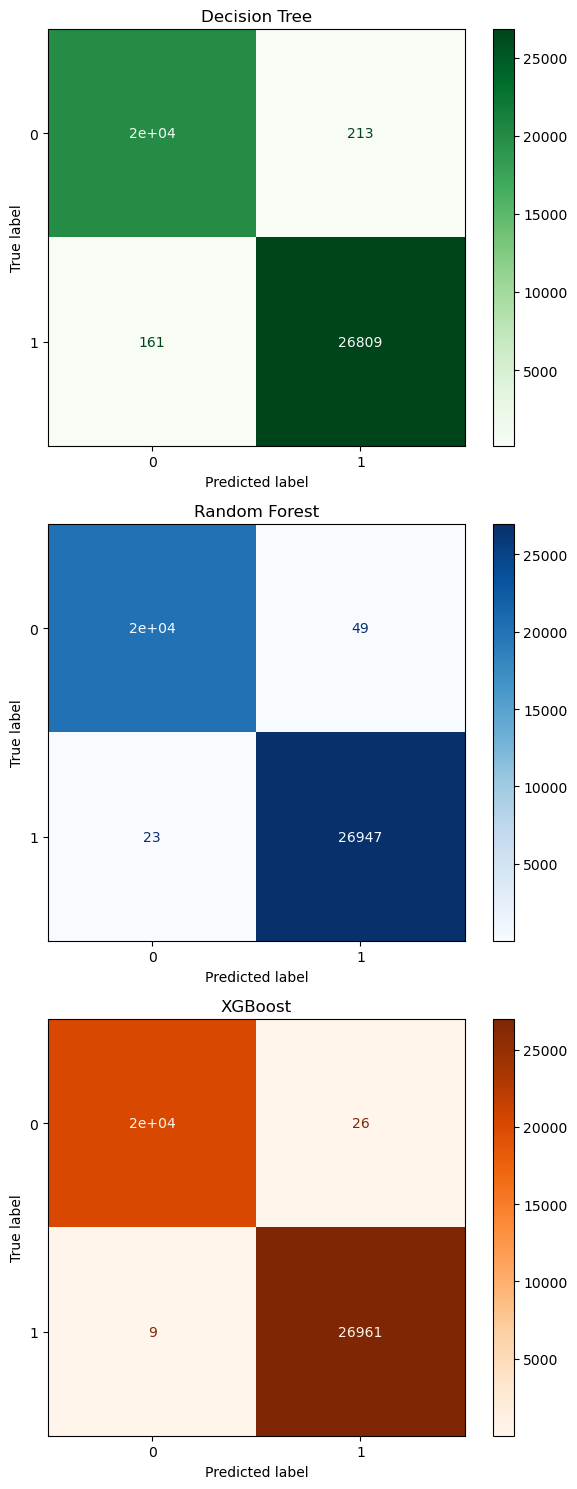

In [69]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Set up 3 vertically stacked plots
fig, axes = plt.subplots(3, 1, figsize=(6, 15))

# Decision Tree
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt, ax=axes[0], cmap='Greens')
axes[0].set_title("Decision Tree")

# Random Forest
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, ax=axes[1], cmap='Blues')
axes[1].set_title("Random Forest")

# XGBoost
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb, ax=axes[2], cmap='Oranges')
axes[2].set_title("XGBoost")

plt.tight_layout()
plt.show()

## Baseline Model Comparison

The XGBoost and Random Forest model are far superior to the Decision Tree model. Therefore, in the next notebook, I will optimize the 2 best models to see how accurate and precise the model can get. 

<br> In addition to that we can see that the XGBoost model is remarkable at classifying URL's as it has a significantly low number of false negatives at .0334% of all URL's. 

<br> With a problem as determintal as phishing, let's see if we can lower this by optimizing the model parameters. 